# Classification of Letters Using KNN and Decision Tree Models - Assignment 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

## Load Dataset

In [4]:
column_names = [
    "letter", "x-box", "y-box", "width", "high", "onpix", "x-bar", "y-bar",
    "x2bar", "y2bar", "xybar", "x2ybr", "xy2br", "x-ege", "xegvy", "y-ege", "yegvx"
]
df = pd.read_csv("./A2 Datasets/A2 Datasets/Dataset 4 - Letter Recognition/letter-recognition.data", header=None, names=column_names)
df.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


## Exploratory Data Analysis

In [6]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [7]:
print(df.isnull().sum())

letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64


In [8]:
# Check if there are any duplicate rows
duplicate_rows = df[df.duplicated()]

duplicate_rows

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [9]:
# Remove duplicate rows and keep the first occurrence
df = df.drop_duplicates()

# Optional: reset index after removal
df.reset_index(drop=True, inplace=True)

In [10]:
print(df[(df.drop('letter', axis=1) == 0).all(axis=1)])

Empty DataFrame
Columns: [letter, x-box, y-box, width, high, onpix, x-bar, y-bar, x2bar, y2bar, xybar, x2ybr, xy2br, x-ege, xegvy, y-ege, yegvx]
Index: []


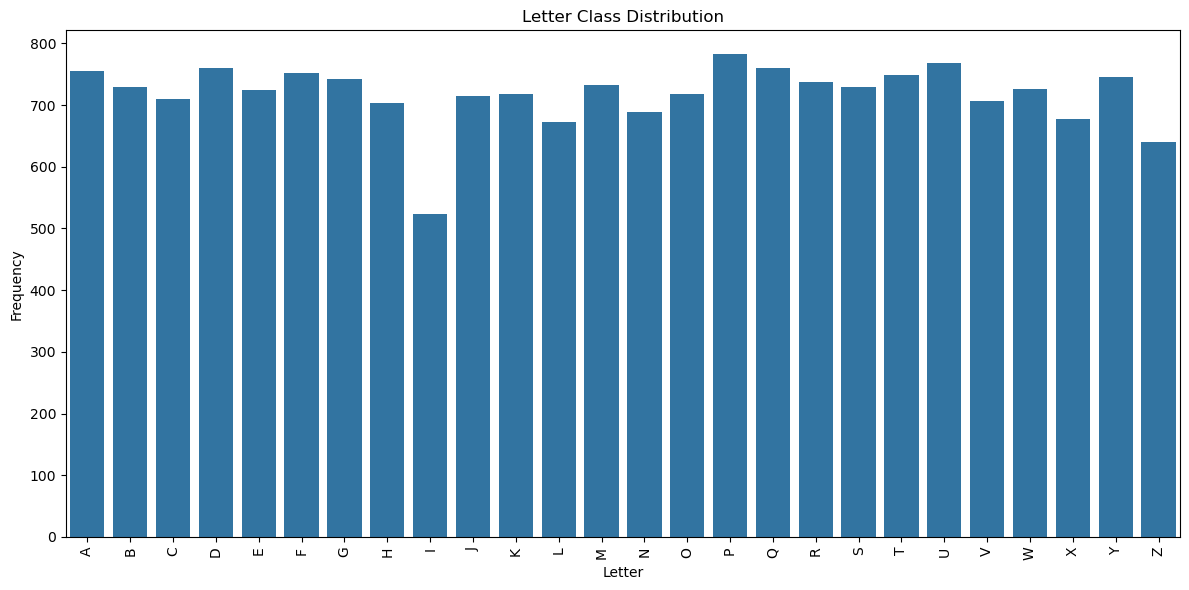

In [11]:
# Sorted via alphabetical order
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='letter', order=sorted(df['letter'].unique()))
plt.title("Letter Class Distribution")
plt.xlabel("Letter")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

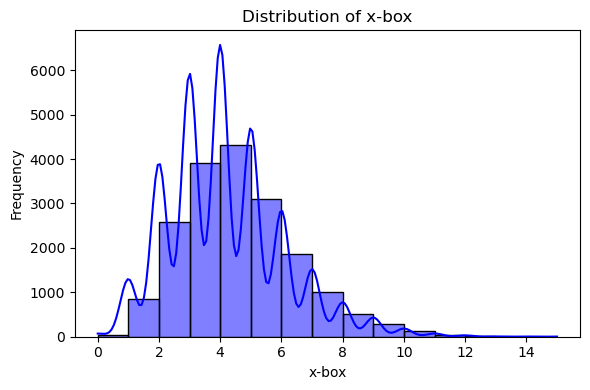

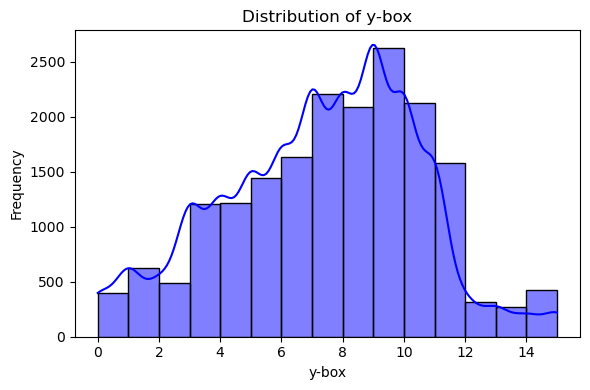

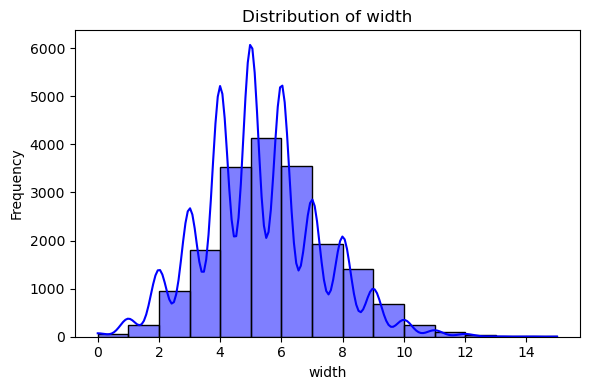

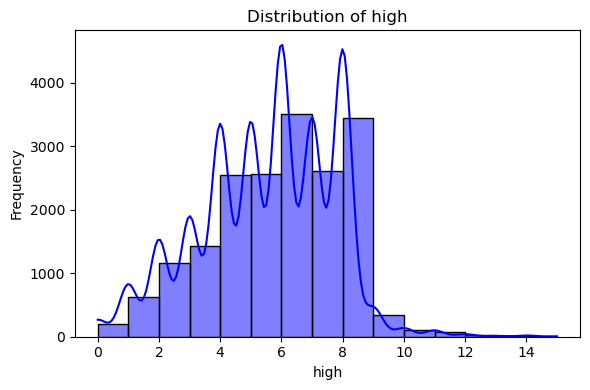

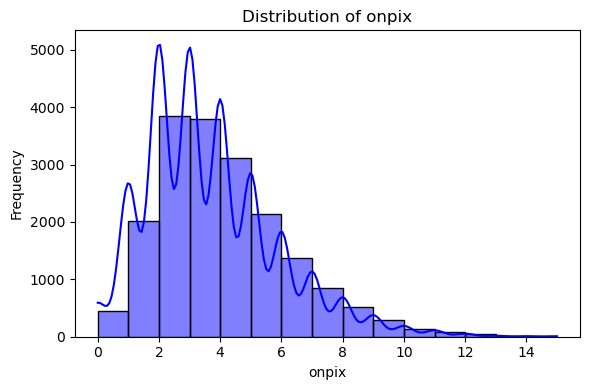

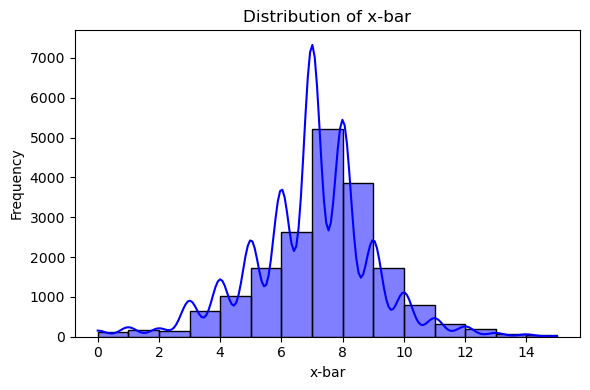

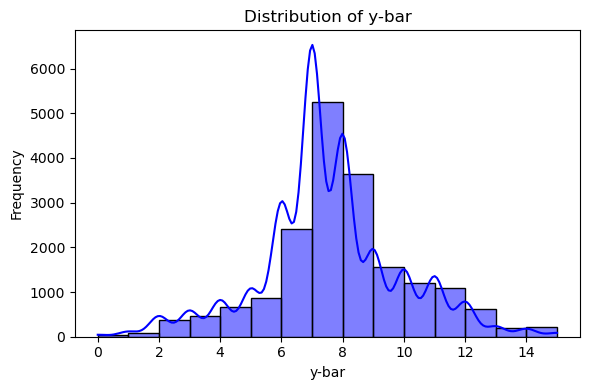

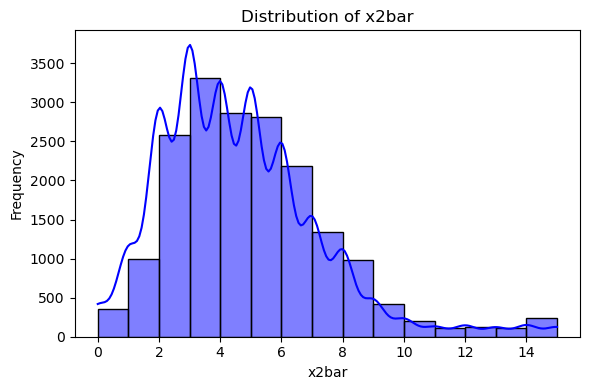

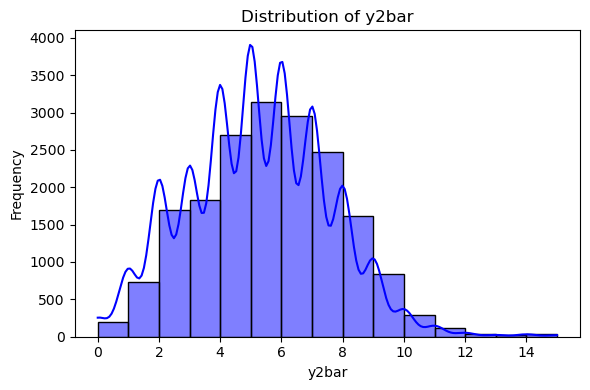

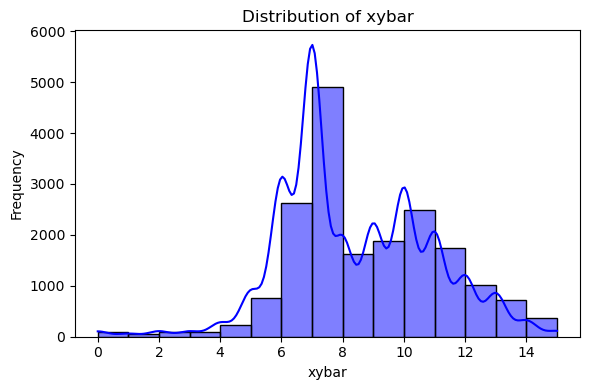

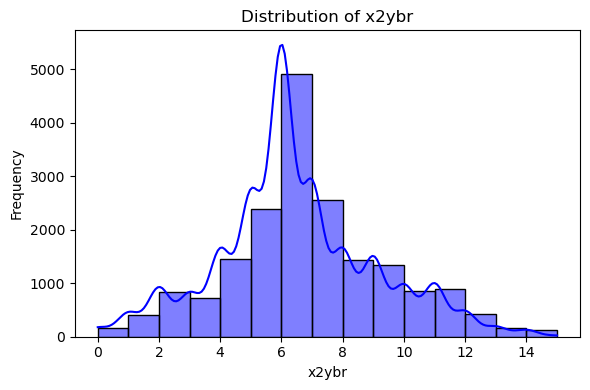

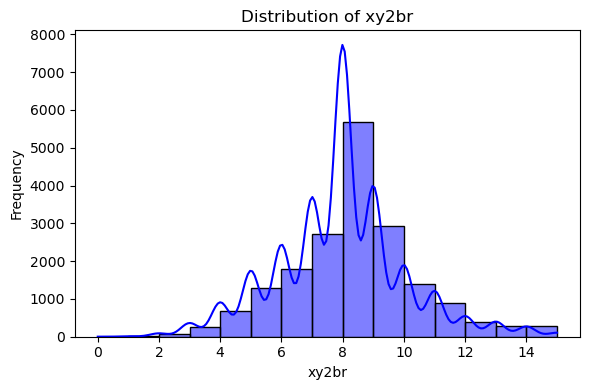

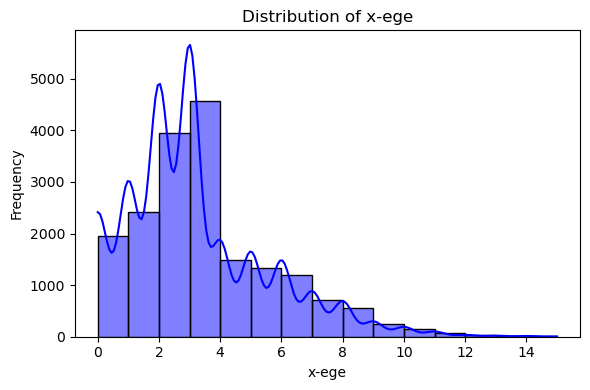

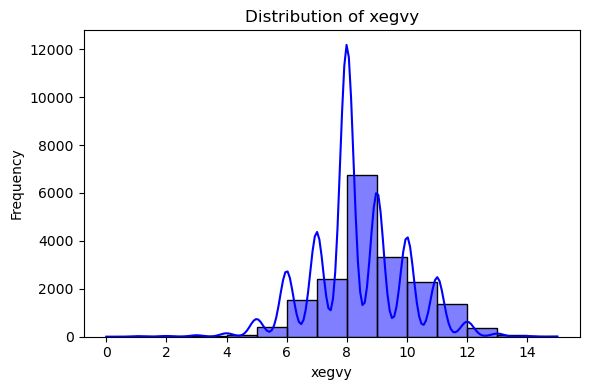

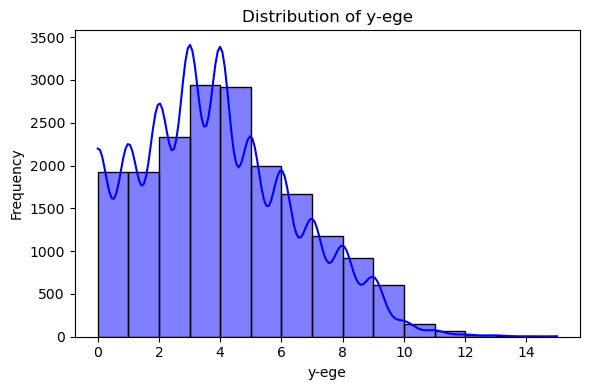

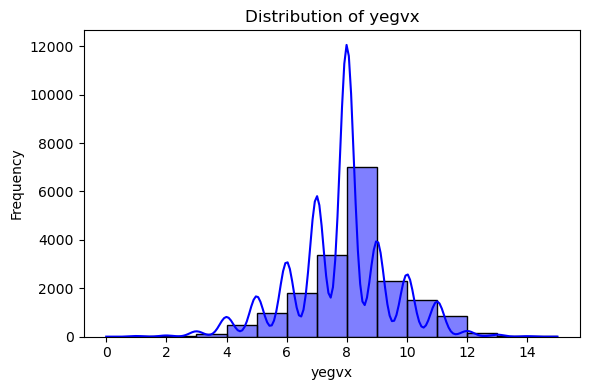

In [12]:
# Remove the first column
feature_columns = df.columns[1:]

# Plot histograms for all columns except the target variable
for col in feature_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='blue', bins=15, edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

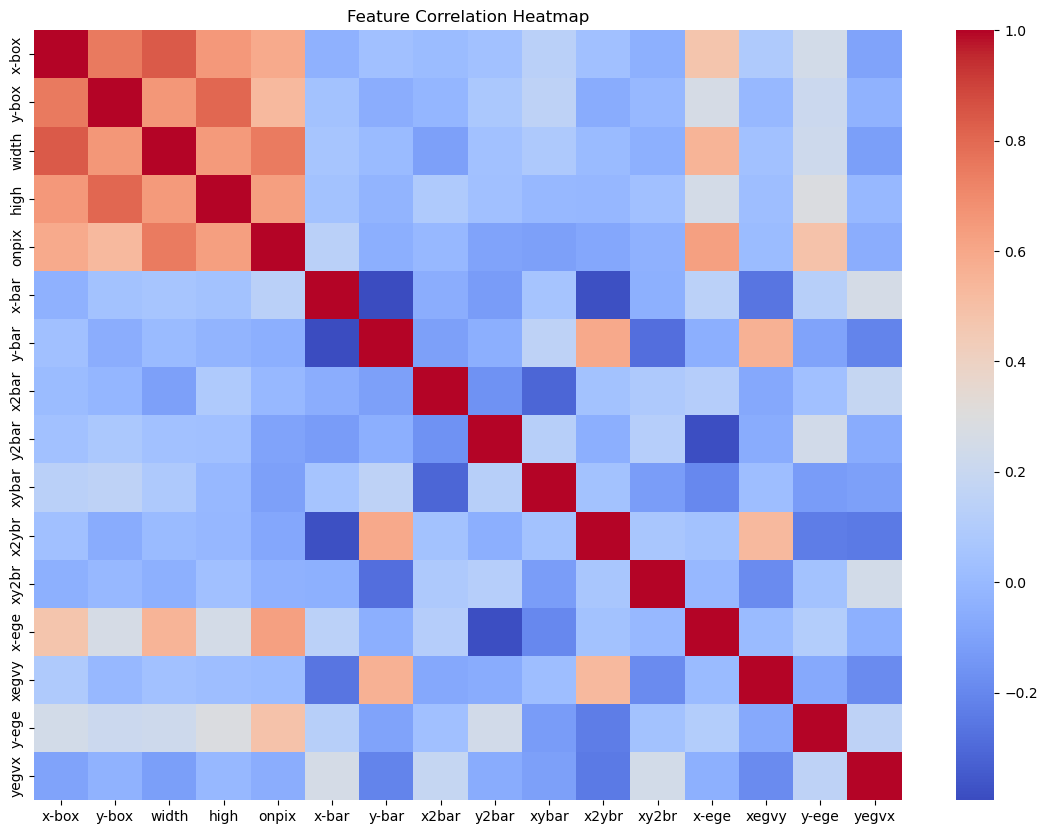

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(df.iloc[:,1:].corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

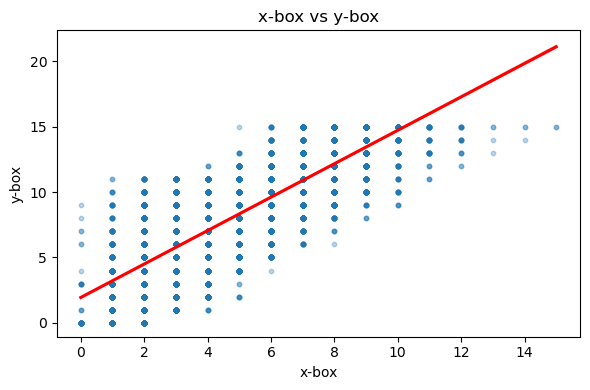

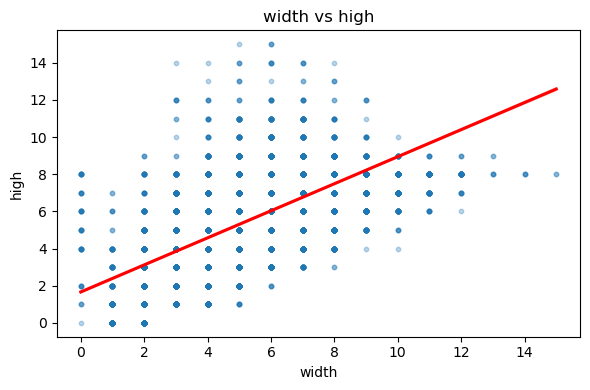

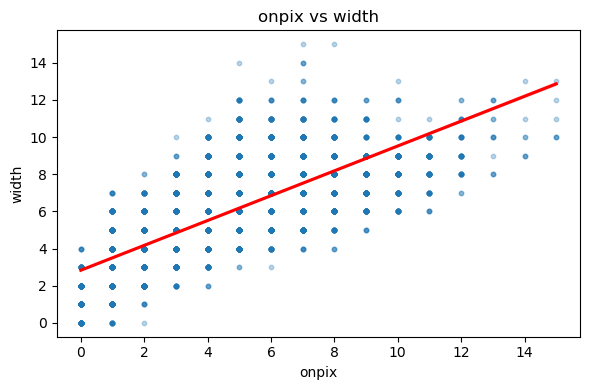

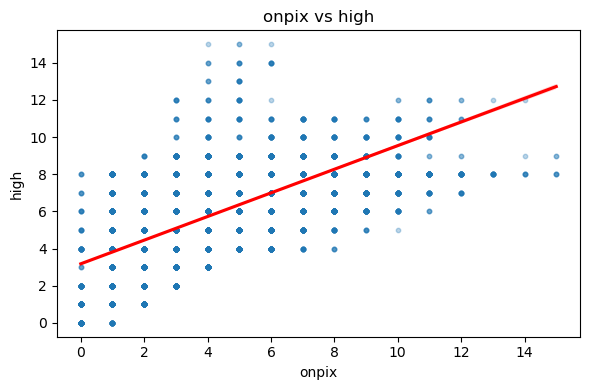

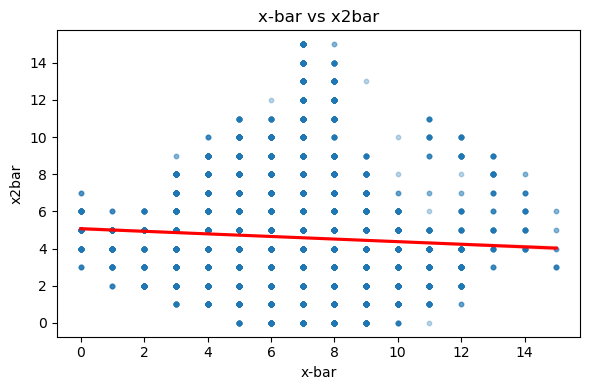

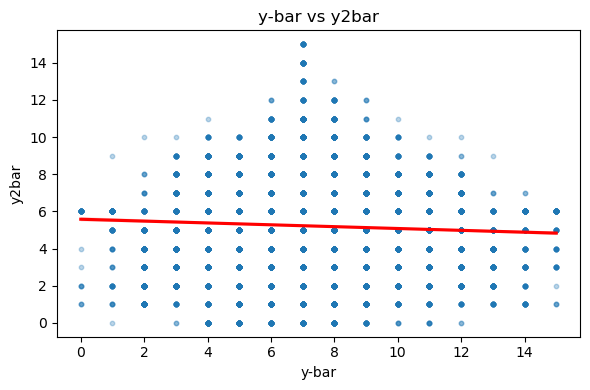

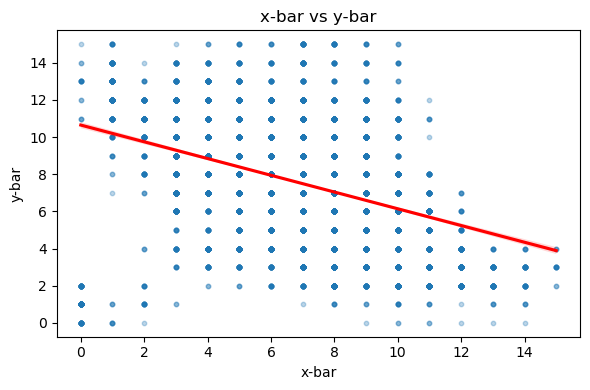

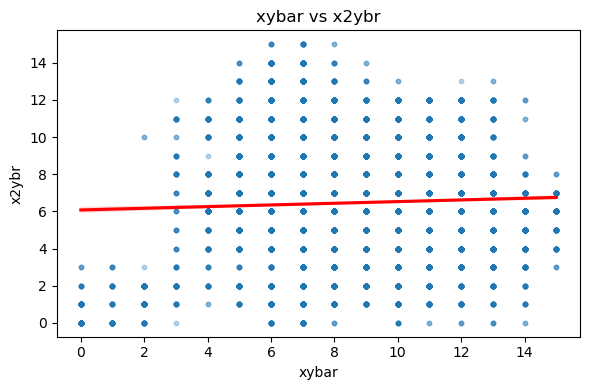

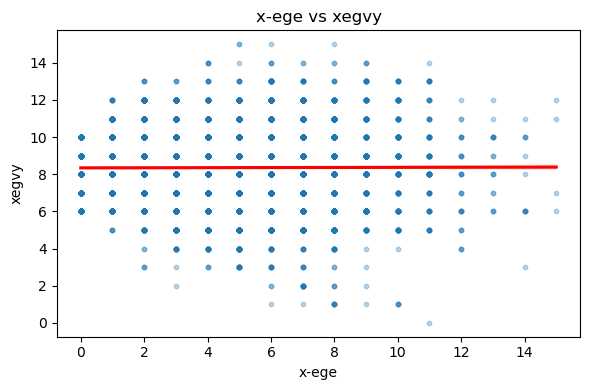

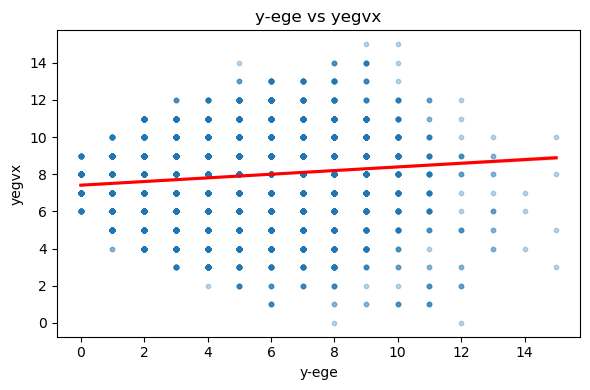

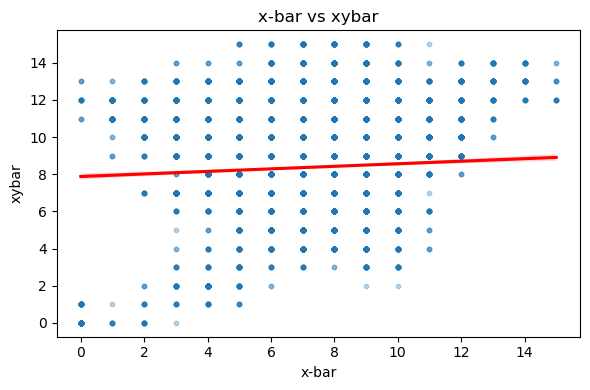

In [14]:
pairwise_pairs = [
    ("x-box", "y-box"),
    ("width", "high"),
    ("onpix", "width"),
    ("onpix", "high"),
    ("x-bar", "x2bar"),
    ("y-bar", "y2bar"),
    ("x-bar", "y-bar"),
    ("xybar", "x2ybr"),
    ("x-ege", "xegvy"),
    ("y-ege", "yegvx"),
    ("x-bar", "xybar"),
]


for col1, col2 in pairwise_pairs:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=df, x=col1, y=col2, scatter_kws={'alpha': 0.3, 's': 10}, line_kws={'color': 'red'})
    plt.title(f"{col1} vs {col2}")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.show()

## Data Preprocessing

In [16]:
X = df.drop("letter", axis=1)
y = df["letter"]

# Step 2: Train-test split 80 to 20 according to the relevant information in the folder
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# Show shapes
print("Shapes of splits:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

# Display first 5 rows from each split
print("\nSample of X_train:")
print(X_train.head())

print("\nSample of X_test:")
print(X_test.head())

print("\nSample of y_train:")
print(y_train.head())

print("\nSample of y_test:")
print(y_test.head())

Shapes of splits:
X_train: (14934, 16)
X_test : (3734, 16)
y_train: (14934,)
y_test : (3734,)

Sample of X_train:
       x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
4288       4      6      6     8      8      9      6      6      3      7   
17449      5     10      6     7      3      9      6      5      8     11   
2517       5     10      6     8      4      7      7     12      2      8   
15342      1      0      1     1      0      1      1      5      5      0   
8792       6      7      9     6     10      7      8      5      5      7   

       x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
4288       8      8      6     10      6      4  
17449      3      7      2      8      5     11  
2517       9      8      8      6      0      8  
15342      1      6      0      8      0      8  
8792       5      8     10     10      8      8  

Sample of X_test:
       x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
18289      4      8 

## Classification Model 1: K-Nearest Neighbours (KNN)

In [19]:
cur_MaxScore = 0.0
new_Ind = []
col_num = X.shape[1]
col_Ind_Random = shuffle(list(range(col_num)), random_state=1)

for cur_f in col_Ind_Random:
    new_Ind.append(cur_f)
    reduced_X = X.iloc[:, new_Ind]

    # Train KNN model
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)

    # Keep feature if it improves score
    if cur_Score < cur_MaxScore:
        new_Ind.remove(cur_f)
    else:
        cur_MaxScore = cur_Score

print("Selected feature indices:", new_Ind)

Selected feature indices: [3, 13, 7, 2, 6, 10, 4, 1, 14, 0, 15, 9, 8, 12, 11, 5]


In [20]:
# Use only the selected features
selected_X = X.iloc[:, new_Ind]
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, test_size=0.2, random_state=0)

# Train and evaluate all three models (no scaling)
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train, y_train)
y_pred_knn1 = knn1.predict(X_test)
print("KNN Model 1: (Uniform weights, Euclidean distance)")
print(classification_report(y_test, y_pred_knn1))
print(confusion_matrix(y_test, y_pred_knn1))

knn2 = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn2.fit(X_train, y_train)
y_pred_knn2 = knn2.predict(X_test)
print("\nKNN Model 2: (Distance weights, Euclidean distance)")
print(classification_report(y_test, y_pred_knn2))
print(confusion_matrix(y_test, y_pred_knn2))

knn3 = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
knn3.fit(X_train, y_train)
y_pred_knn3 = knn3.predict(X_test)
print("\nKNN Model 3: (Distance weights, Manhattan distance)")
print(classification_report(y_test, y_pred_knn3))
print(confusion_matrix(y_test, y_pred_knn3))

KNN Model 1: (Uniform weights, Euclidean distance)
              precision    recall  f1-score   support

           A       1.00      0.99      0.99       147
           B       0.90      0.96      0.93       162
           C       0.96      0.95      0.96       152
           D       0.94      0.99      0.97       154
           E       0.93      0.95      0.94       129
           F       0.94      0.93      0.94       157
           G       0.91      0.93      0.92       171
           H       0.90      0.91      0.90       131
           I       0.95      0.92      0.93       119
           J       0.93      0.96      0.94       132
           K       0.89      0.91      0.90       124
           L       0.99      0.96      0.97       156
           M       0.97      0.94      0.96       141
           N       0.98      0.97      0.98       128
           O       0.94      0.94      0.94       143
           P       0.97      0.93      0.95       150
           Q       0.97      0

## Classification Model 2: Decision Tree

In [22]:
# Model 1: Basic Decision Tree (default parameters)
clf1 = DecisionTreeClassifier()
fit1 = clf1.fit(X_train, y_train)
y_pred1 = fit1.predict(X_test)

print("Model 1: Decision Tree (default parameters)")
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

# Model 2: Add max_depth=15
clf2 = DecisionTreeClassifier(max_depth=10, random_state=42)
fit2 = clf2.fit(X_train, y_train)
y_pred2 = fit2.predict(X_test)

print("\nModel 2: max_depth=10")
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

# Model 2: Add max_depth=21
clf6 = DecisionTreeClassifier(max_depth=21, random_state=42)
fit6 = clf6.fit(X_train, y_train)
y_pred6 = fit6.predict(X_test)

print("\nModel 3: max_depth=21")
print(confusion_matrix(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

# Model 3: Add min_samples_leaf=2
clf3 = DecisionTreeClassifier(max_depth=21, min_samples_leaf=2, random_state=42)
fit3 = clf3.fit(X_train, y_train)
y_pred3 = fit3.predict(X_test)

print("\nModel 4: max_depth=15, min_samples_leaf=2")
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

# Model 4: Use entropy instead of gini
clf4 = DecisionTreeClassifier(
    max_depth=15,
    min_samples_leaf=2,
    random_state=42,
    criterion='entropy'
)
fit4 = clf4.fit(X_train, y_train)
y_pred4 = fit4.predict(X_test)

print("\nModel 5: max_depth=15, min_samples_leaf=2, criterion='entropy'")
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

# Model 5: Only change criterion to entropy
clf5 = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
fit5 = clf5.fit(X_train, y_train)
y_pred5 = fit5.predict(X_test)

print("\nModel 6: criterion='entropy'")
print(confusion_matrix(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

Model 1: Decision Tree (default parameters)
[[133   0   1   0   0   2   0   2   0   1   3   3   1   1   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 135   0   3   2   3   1   2   1   0   2   0   0   1   1   1   0   5
    2   1   0   1   0   1   0   0]
 [  0   0 135   0   1   1   6   0   0   0   0   0   0   0   1   0   1   0
    1   3   3   0   0   0   0   0]
 [  0   4   0 126   1   0   1   4   0   1   0   1   0   2   7   2   0   0
    1   0   0   0   0   4   0   0]
 [  0   0   3   1 109   1   1   1   0   0   1   0   0   0   0   2   2   0
    2   0   0   0   0   2   0   4]
 [  0   1   3   0   0 130   0   1   1   2   0   0   0   0   0   8   0   0
    2   5   0   0   1   0   3   0]
 [  2   1   4   2   3   1 136   1   1   1   1   1   1   1   1   1   1   0
    2   0   5   0   1   0   4   0]
 [  0   1   0   3   0   0   2 110   1   0   3   0   0   1   3   0   0   2
    1   0   0   0   1   1   2   0]
 [  0   0   0   1   3   2   0   0  97  10   0   0   0   0   0   2   0   1
    0   3 

## Model Comparison Summary

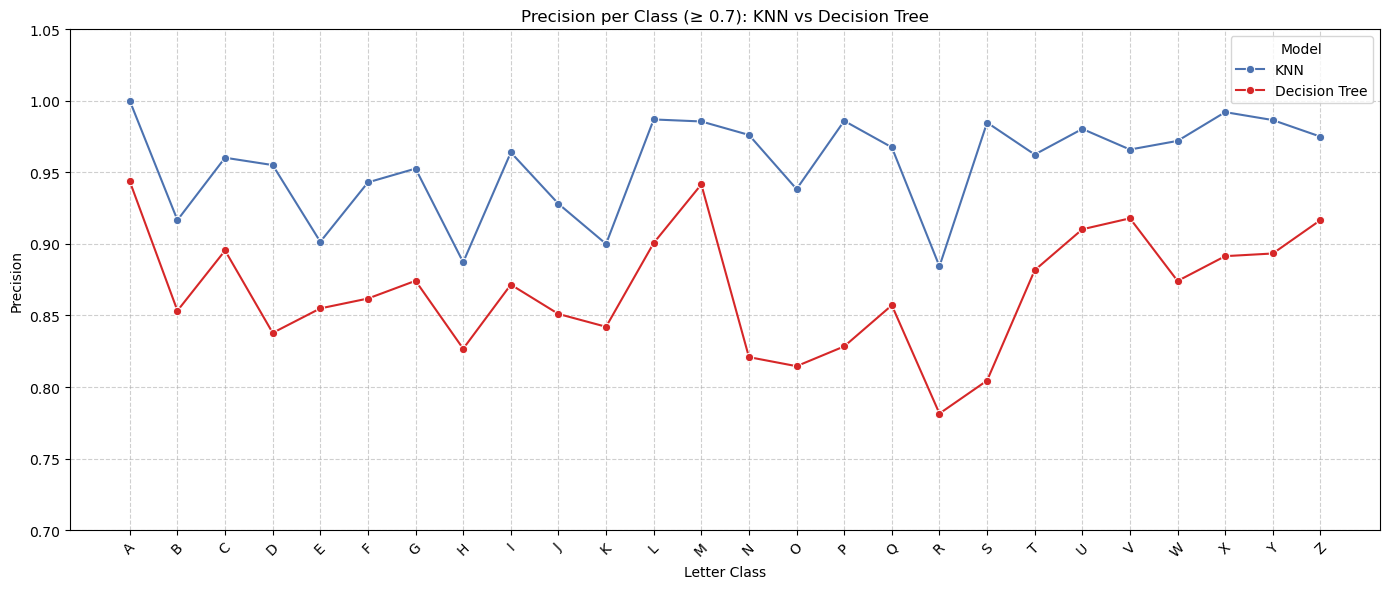

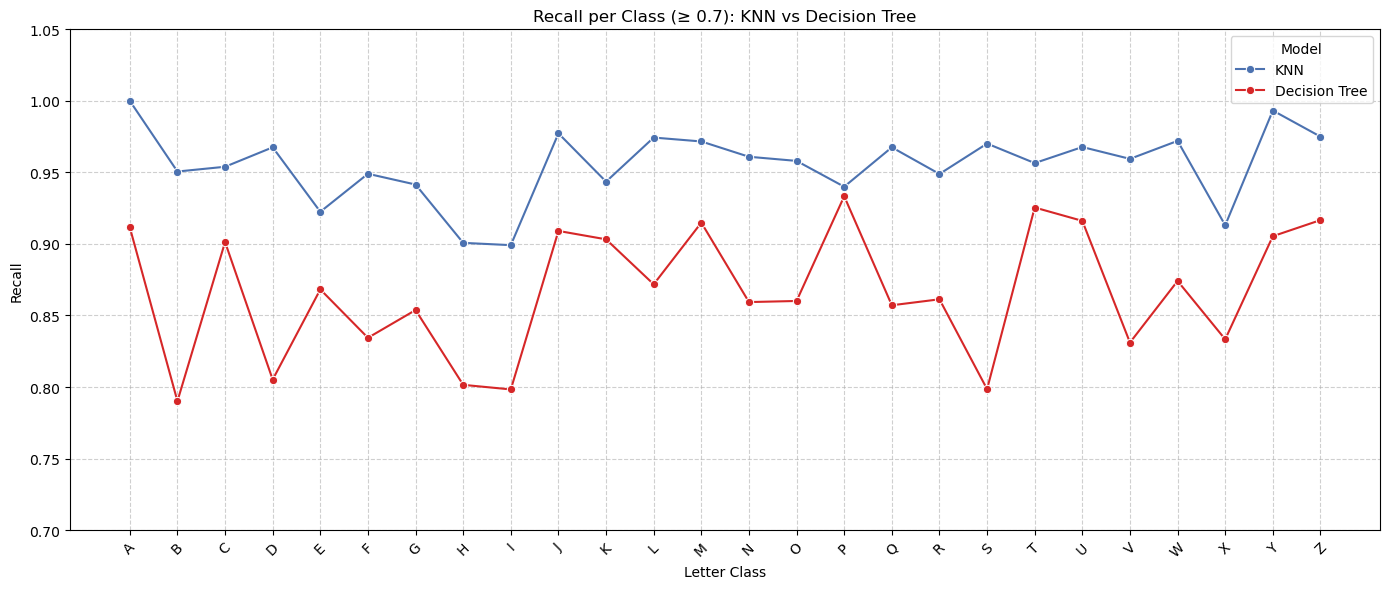

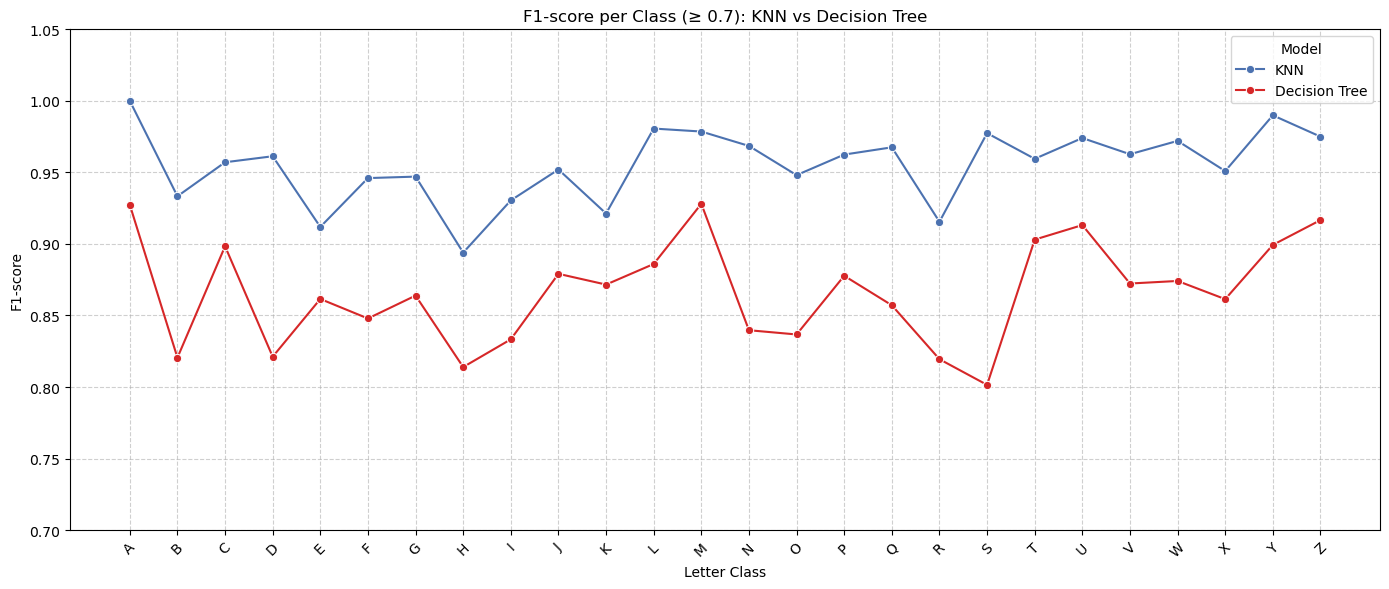

In [24]:
report_knn = classification_report(y_test, y_pred_knn3, output_dict=True)
report_tree = classification_report(y_test, y_pred5, output_dict=True)

df_knn = pd.DataFrame(report_knn).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])
df_tree = pd.DataFrame(report_tree).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])

df_knn['model'] = 'KNN'
df_tree['model'] = 'Decision Tree'

combined_df = pd.concat([df_knn, df_tree])
combined_df.reset_index(inplace=True)
combined_df.rename(columns={'index': 'Class'}, inplace=True)

metrics = ['precision', 'recall', 'f1-score']
class_order = sorted(combined_df['Class'].unique())  # A-Z order

for metric in metrics:
    plt.figure(figsize=(14, 6))
    
    filtered_data = combined_df[combined_df[metric] >= 0.7]
    
    sns.lineplot(
        data=filtered_data,
        x='Class',
        y=metric,
        hue='model',
        marker='o',
        sort=False,
        palette=['#4c72b0', '#d62728'],
        hue_order=['KNN', 'Decision Tree']
    )
    
    plt.title(f'{metric.capitalize()} per Class (≥ 0.7): KNN vs Decision Tree')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Letter Class')
    plt.xticks(rotation=45)
    plt.ylim(0.7, 1.05)
    plt.legend(title='Model')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()